In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('./city_day.csv')

In [10]:
df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN


In [11]:
df = data.drop(['AQI_Bucket','Xylene','O3','Benzene'],axis=1)

In [12]:
non_numeric_cols = df[['City','Date']]

In [13]:
df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,0.02,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,5.50,NaN


In [14]:
df.shape

(29531, 12)

In [15]:
df.isnull().sum()

City           0
Date           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
Toluene     8041
AQI         4681
dtype: int64

In [16]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI'],
      dtype='object')

In [17]:
cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI']

# Handling Outliers

<h3>Visualization of Outliers using Boxplot</h3>

<Axes: >

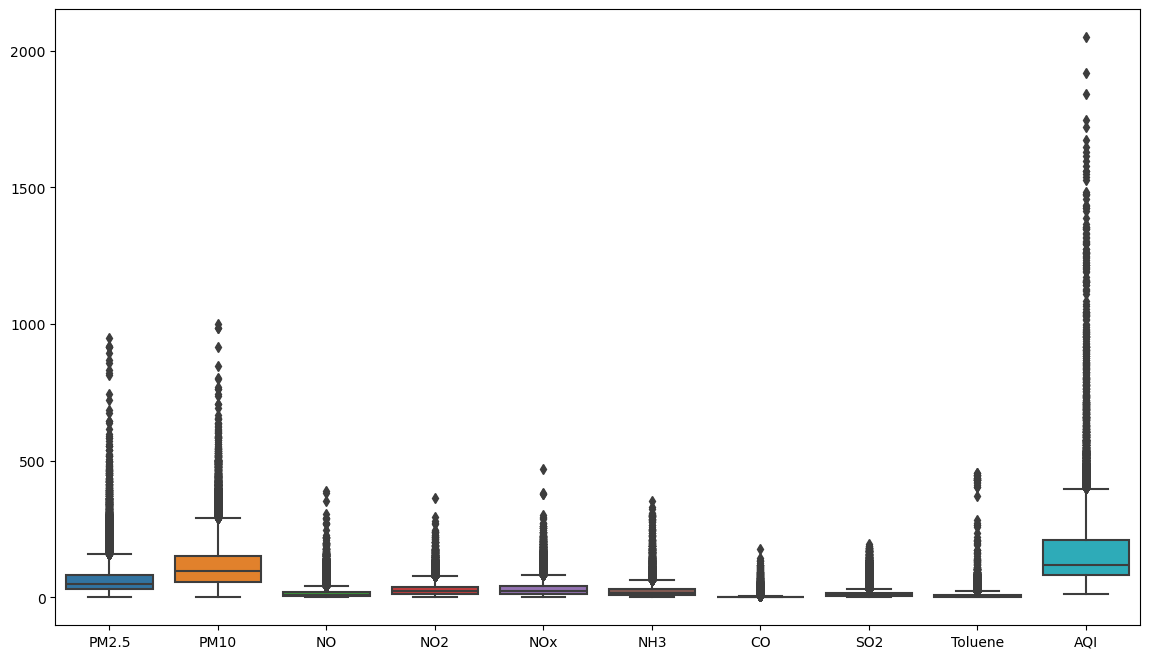

In [22]:
plt.figure(figsize=(14,8))
sns.boxplot(df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

In [23]:
new_df = df.copy()

In [24]:
for i in cols:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)

  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5*iqr
  lower_limit = percentile25 - 1.5*iqr



  new_df[i] = np.where(new_df[i]>upper_limit,
                          upper_limit,
                          np.where(
                              new_df[i]<lower_limit,
                              lower_limit,
                              new_df[i]
                          ))

<Axes: >

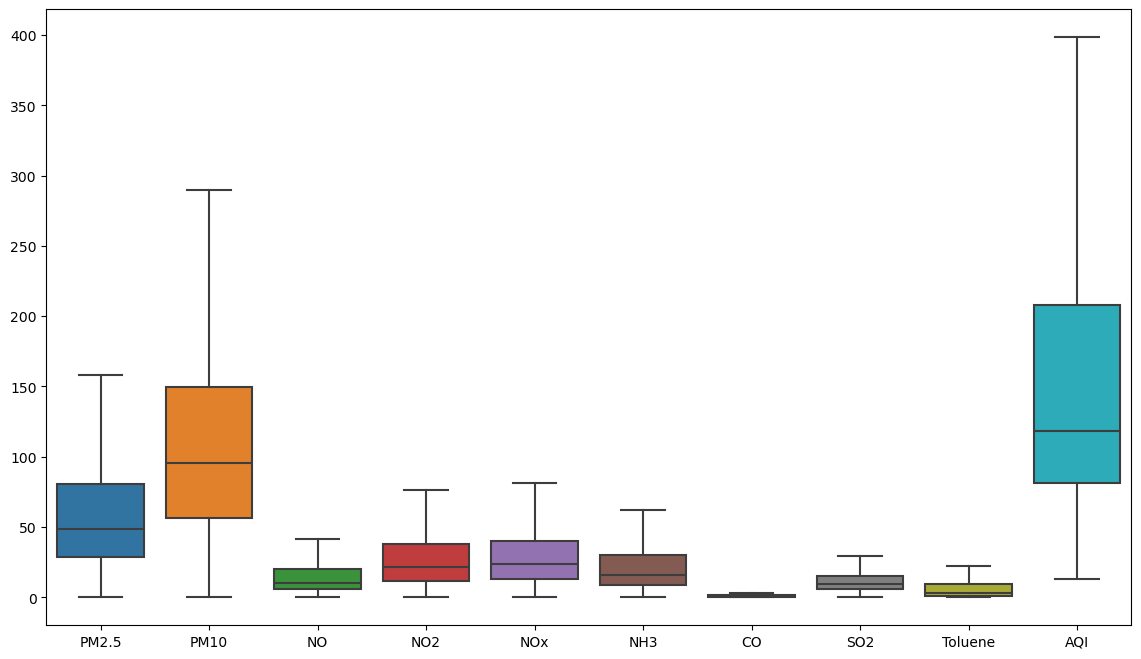

In [25]:
plt.figure(figsize=(14,8))
sns.boxplot(new_df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

<p>Now as we can see all the outliers have been removed from our dataset</p>

In [29]:
new_df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,0.02,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,5.50,NaN


In [30]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['day'] = new_df['Date'].dt.day
new_df['weekday'] = new_df['Date'].dt.weekday
new_df['dayofyear'] = new_df['Date'].dt.dayofyear

In [31]:
new_df.drop('Date', axis=1, inplace=True)

In [32]:
new_df.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,month,day,weekday,dayofyear
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,0.02,NaN,2015,1,1,3,1
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,5.50,NaN,2015,1,2,4,2


In [33]:
# Converting categorical data into a numerical format using oneHotEncoder, so that it can be used by our MICE algorithm for imputation.
from sklearn.preprocessing import OneHotEncoder

cities = new_df[['City']]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

city_encoded = encoder.fit_transform(cities)
city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))

df_encoded = pd.concat([new_df.drop('City', axis=1), city_encoded_df], axis=1)

In [35]:
# These are our columns after encoding our cities
df_encoded.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene',
       'AQI', 'year', 'month', 'day', 'weekday', 'dayofyear', 'City_Ahmedabad',
       'City_Aizawl', 'City_Amaravati', 'City_Amritsar', 'City_Bengaluru',
       'City_Bhopal', 'City_Brajrajnagar', 'City_Chandigarh', 'City_Chennai',
       'City_Coimbatore', 'City_Delhi', 'City_Ernakulam', 'City_Gurugram',
       'City_Guwahati', 'City_Hyderabad', 'City_Jaipur', 'City_Jorapokhar',
       'City_Kochi', 'City_Kolkata', 'City_Lucknow', 'City_Mumbai',
       'City_Patna', 'City_Shillong', 'City_Talcher',
       'City_Thiruvananthapuram', 'City_Visakhapatnam'],
      dtype='object')

In [37]:
# Statistical data about encoded dataframe.
df_encoded.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,61.148955,42.803676,0.04,28.820,48.57,80.5900,158.24500
PM10,18391.0,112.877919,73.706540,0.01,56.255,95.68,149.7450,289.98000
NO,25949.0,14.507996,12.246567,0.02,5.630,9.89,19.9500,41.43000
NO2,25946.0,27.259387,19.691661,0.01,11.750,21.69,37.6200,76.42500
NOx,25346.0,29.539227,22.721584,0.00,12.820,23.52,40.1275,81.08875
NH3,19203.0,21.361087,16.688309,0.01,8.580,15.85,30.0200,62.18000
CO,27472.0,1.079514,0.815915,0.00,0.510,0.89,1.4500,2.86000
SO2,25677.0,11.743115,8.220634,0.01,5.670,9.16,15.2200,29.54500
Toluene,21490.0,6.231113,7.332004,0.00,0.600,2.97,9.1500,21.97500
AQI,24850.0,157.342455,103.870019,13.00,81.000,118.00,208.0000,398.50000


<h3>Now, we will divide our dataset into training and testing sets using train_test_split</h3>

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape

((23624, 41), (5907, 41))

<h3>For filling missing data we'll be using <strong>MICE</strong> technique (Multivariate Imputation by Chained Equations) which we can implement using iterative imputer method from scikit-learn.</h3>


<h2>Implementing Iterative Imputer using ElasticNet estimator.</h2>

In [43]:
#importing required methods
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

#model creation
elastic_net_imputer = IterativeImputer(
    estimator=ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    max_iter=200,
    random_state=42,
    verbose=2,
    tol = 1e-10
)

#fitting and transforming X_train and X_test
X_train_imputed = elastic_net_imputer.fit_transform(X_train)
X_test_imputed = elastic_net_imputer.transform(X_test)

print("Imputed X_train:")
print(pd.DataFrame(X_train_imputed).head())
print("\nImputed X_test:")
print(pd.DataFrame(X_test_imputed).head())

[IterativeImputer] Completing matrix with shape (23624, 41)
[IterativeImputer] Ending imputation round 1/200, elapsed time 0.76
[IterativeImputer] Change: 470.7214350419918, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 2/200, elapsed time 1.70
[IterativeImputer] Change: 161.18175828013182, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 3/200, elapsed time 2.68
[IterativeImputer] Change: 50.87049369129261, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 4/200, elapsed time 3.66
[IterativeImputer] Change: 42.44897024163242, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 5/200, elapsed time 4.58
[IterativeImputer] Change: 35.655140891362095, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 6/200, elapsed time 5.60
[IterativeImputer] Change: 29.975944328508234, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 7/200, elapsed time 6.80
[IterativeImputer

/Users/kavyasmac/anaconda3/envs/new_env/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Ending imputation round 47/200, elapsed time 0.20
[IterativeImputer] Ending imputation round 48/200, elapsed time 0.21
[IterativeImputer] Ending imputation round 49/200, elapsed time 0.22
[IterativeImputer] Ending imputation round 50/200, elapsed time 0.22
[IterativeImputer] Ending imputation round 51/200, elapsed time 0.23
[IterativeImputer] Ending imputation round 52/200, elapsed time 0.23
[IterativeImputer] Ending imputation round 53/200, elapsed time 0.23
[IterativeImputer] Ending imputation round 54/200, elapsed time 0.25
[IterativeImputer] Ending imputation round 55/200, elapsed time 0.25
[IterativeImputer] Ending imputation round 56/200, elapsed time 0.25
[IterativeImputer] Ending imputation round 57/200, elapsed time 0.26
[IterativeImputer] Ending imputation round 58/200, elapsed time 0.27
[IterativeImputer] Ending imputation round 59/200, elapsed time 0.27
[IterativeImputer] Ending imputation round 60/200, elapsed time 0.27
[IterativeImputer] Ending imputati

In [44]:
# Converting imputed result into dataframe
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [45]:
# Combining imputed X_train and X_test for analysing
X_combined = pd.concat([X_train_imputed, X_test_imputed], axis=0)

In [47]:
# Checking for null/missing values in combined dataframe
X_combined.isnull().sum()

PM2.5                      0
PM10                       0
NO                         0
NO2                        0
NOx                        0
NH3                        0
CO                         0
SO2                        0
Toluene                    0
AQI                        0
year                       0
month                      0
day                        0
weekday                    0
dayofyear                  0
City_Ahmedabad             0
City_Aizawl                0
City_Amaravati             0
City_Amritsar              0
City_Bengaluru             0
City_Bhopal                0
City_Brajrajnagar          0
City_Chandigarh            0
City_Chennai               0
City_Coimbatore            0
City_Delhi                 0
City_Ernakulam             0
City_Gurugram              0
City_Guwahati              0
City_Hyderabad             0
City_Jaipur                0
City_Jorapokhar            0
City_Kochi                 0
City_Kolkata               0
City_Lucknow  

<h5>Changes in Statistical Data of numeric columns before and after Imputing</h5>

In [94]:
# Before ElasticNet Imputation
new_df.describe().transpose()[:10]

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,61.148955,42.803676,0.04,28.820,48.57,80.5900,158.24500
PM10,18391.0,112.877919,73.706540,0.01,56.255,95.68,149.7450,289.98000
NO,25949.0,14.507996,12.246567,0.02,5.630,9.89,19.9500,41.43000
NO2,25946.0,27.259387,19.691661,0.01,11.750,21.69,37.6200,76.42500
NOx,25346.0,29.539227,22.721584,0.00,12.820,23.52,40.1275,81.08875
NH3,19203.0,21.361087,16.688309,0.01,8.580,15.85,30.0200,62.18000
CO,27472.0,1.079514,0.815915,0.00,0.510,0.89,1.4500,2.86000
SO2,25677.0,11.743115,8.220634,0.01,5.670,9.16,15.2200,29.54500
Toluene,21490.0,6.231113,7.332004,0.00,0.600,2.97,9.1500,21.97500
AQI,24850.0,157.342455,103.870019,13.00,81.000,118.00,208.0000,398.50000


In [95]:
# After ElasticNet Imputation
X_combined.describe().transpose()[:10]

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,61.259746,40.365000,-7.230246,31.14,51.930000,78.384357,158.245000
PM10,29531.0,125.957189,74.008758,0.010000,70.57,110.223276,162.545000,328.696143
NO,29531.0,14.447791,11.794683,-2.236934,5.93,10.591630,18.480000,41.430000
NO2,29531.0,27.014502,18.806881,-5.098843,12.38,22.656950,35.725000,76.425000
NOx,29531.0,28.805694,21.464161,0.000000,13.65,23.960000,36.805000,81.370011
NH3,29531.0,22.605571,14.222345,0.010000,11.78,21.229203,29.120000,62.180000
CO,29531.0,1.081697,0.789660,0.000000,0.54,0.940000,1.400000,2.860000
SO2,29531.0,11.547939,7.724630,0.010000,6.09,9.460000,14.000000,29.545000
Toluene,29531.0,5.992702,6.440144,-3.246351,1.14,4.000000,7.808458,21.975000
AQI,29531.0,156.426263,98.172839,-5.033760,85.00,125.000000,200.000000,419.746783


<h5>Changes in Correlation of various important columns with 'AQI' after Imputing</h5>

In [86]:
# Before ElasticNet Imputation
new_df.corr(numeric_only=True)['AQI'][:-5]

PM2.5      0.846661
PM10       0.850268
NO         0.513341
NO2        0.510401
NOx        0.529350
NH3        0.379542
CO         0.579902
SO2        0.399403
Toluene    0.400889
AQI        1.000000
Name: AQI, dtype: float64

In [88]:
# After ElasticNet Imputation
X_combined.corr(numeric_only=True)['AQI'][:11]

PM2.5      0.852206
PM10       0.883562
NO         0.517950
NO2        0.510100
NOx        0.504211
NH3        0.421930
CO         0.566103
SO2        0.401233
Toluene    0.416770
AQI        1.000000
year      -0.234248
Name: AQI, dtype: float64

<Axes: >

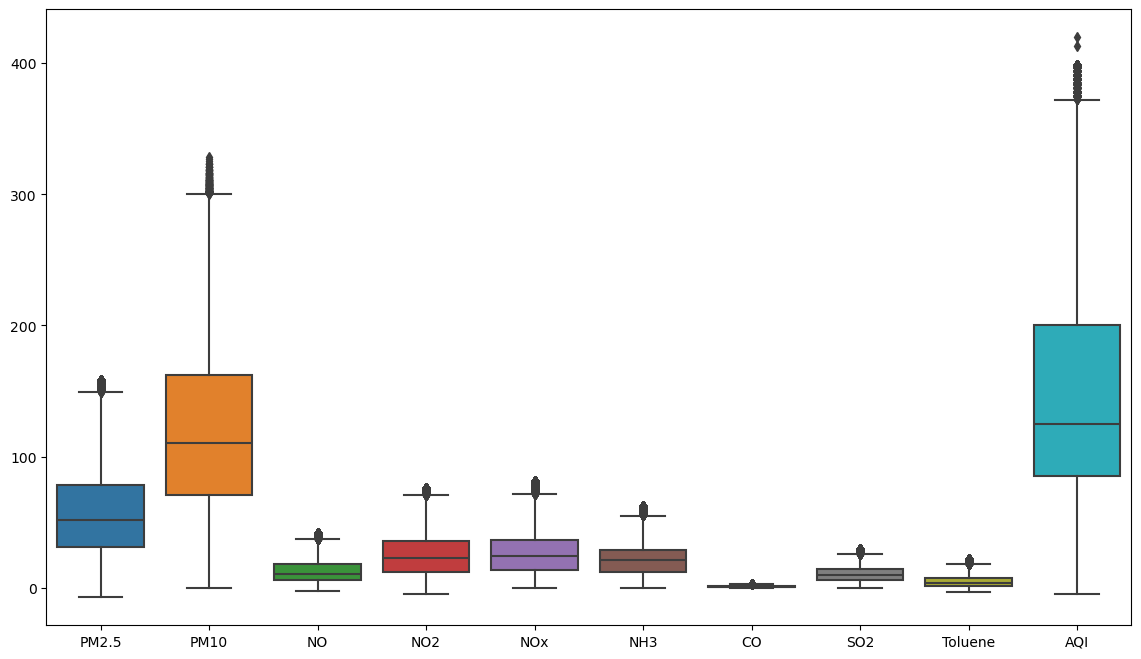

In [52]:
plt.figure(figsize=(14,8))
sns.boxplot(X_combined[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

<Axes: >

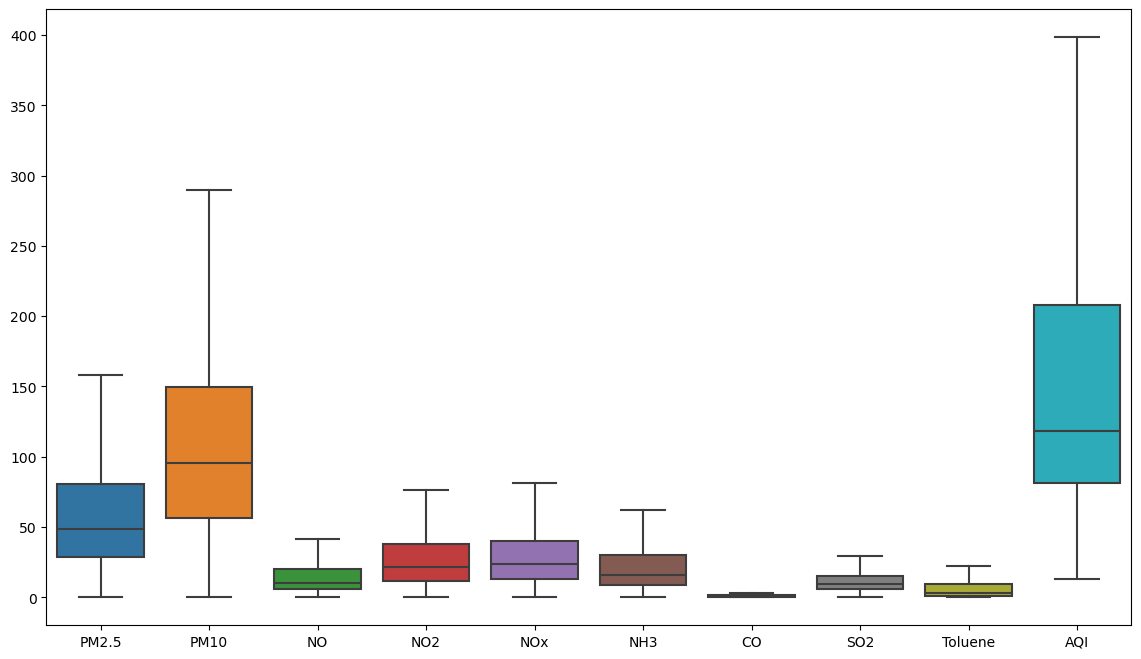

In [53]:
plt.figure(figsize=(14,8))
sns.boxplot(new_df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

In [54]:
X_combined.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene',
       'AQI', 'year', 'month', 'day', 'weekday', 'dayofyear', 'City_Ahmedabad',
       'City_Aizawl', 'City_Amaravati', 'City_Amritsar', 'City_Bengaluru',
       'City_Bhopal', 'City_Brajrajnagar', 'City_Chandigarh', 'City_Chennai',
       'City_Coimbatore', 'City_Delhi', 'City_Ernakulam', 'City_Gurugram',
       'City_Guwahati', 'City_Hyderabad', 'City_Jaipur', 'City_Jorapokhar',
       'City_Kochi', 'City_Kolkata', 'City_Lucknow', 'City_Mumbai',
       'City_Patna', 'City_Shillong', 'City_Talcher',
       'City_Thiruvananthapuram', 'City_Visakhapatnam'],
      dtype='object')

In [101]:
X_train_imputed['Date'] = pd.to_datetime(X_train_imputed[['year', 'month', 'day']])
X_train_imputed[['year', 'month', 'day', 'weekday', 'dayofyear','Date']].head(10)

,year,month,day,weekday,dayofyear,Date
0,2018.0,3.0,13.0,1.0,72.0,2018-03-13
1,2019.0,12.0,17.0,1.0,351.0,2019-12-17
2,2020.0,4.0,20.0,0.0,111.0,2020-04-20
3,2020.0,3.0,15.0,6.0,75.0,2020-03-15
4,2018.0,9.0,2.0,6.0,245.0,2018-09-02
5,2018.0,10.0,14.0,6.0,287.0,2018-10-14
6,2018.0,9.0,27.0,3.0,270.0,2018-09-27
7,2018.0,10.0,8.0,0.0,281.0,2018-10-08
8,2018.0,8.0,4.0,5.0,216.0,2018-08-04
9,2016.0,3.0,28.0,0.0,88.0,2016-03-28


In [102]:
X_test_imputed['Date'] = pd.to_datetime(X_test_imputed[['year', 'month', 'day']])
X_test_imputed[['year', 'month', 'day', 'weekday', 'dayofyear','Date']].head(10)

,year,month,day,weekday,dayofyear,Date
0,2017.0,1.0,8.0,6.0,8.0,2017-01-08
1,2016.0,8.0,27.0,5.0,240.0,2016-08-27
2,2016.0,5.0,15.0,6.0,136.0,2016-05-15
3,2019.0,5.0,8.0,2.0,128.0,2019-05-08
4,2017.0,11.0,6.0,0.0,310.0,2017-11-06
5,2019.0,9.0,24.0,1.0,267.0,2019-09-24
6,2019.0,6.0,18.0,1.0,169.0,2019-06-18
7,2017.0,9.0,18.0,0.0,261.0,2017-09-18
8,2019.0,2.0,27.0,2.0,58.0,2019-02-27
9,2017.0,11.0,4.0,5.0,308.0,2017-11-04


In [103]:
# Handling multiple city columns and converting to a single 'City' column
city_columns = [col for col in X_train_imputed.columns if col.startswith('City_')]
X_train_imputed['City'] = X_train_imputed[city_columns].idxmax(axis=1).str.replace('City_', '')

# Dropping the encoded city columns
X_train_imputed.drop(columns=city_columns, inplace=True)
X_train_imputed.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,month,day,weekday,dayofyear,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.910000,9.800000,2.860000,17.180000,10.051466,325.000000,2018.0,3.0,13.0,1.0,72.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.780000,15.920000,1.120000,8.240000,7.530000,128.000000,2019.0,12.0,17.0,1.0,351.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.710000,6.010000,0.480000,5.800000,2.722763,46.000000,2020.0,4.0,20.0,0.0,111.0,2020-04-20,Thiruvananthapuram
3,51.383514,110.719213,13.414774,24.707616,27.955343,18.924246,0.994469,12.273934,6.319510,133.649517,2020.0,3.0,15.0,6.0,75.0,2020-03-15,Talcher
4,16.660000,45.859543,7.440000,28.000000,23.790000,28.830000,0.820000,5.030000,0.210000,69.000000,2018.0,9.0,2.0,6.0,245.0,2018-09-02,Lucknow


In [104]:
# Handling multiple city columns and converting to a single 'City' column
city_columns = [col for col in X_test_imputed.columns if col.startswith('City_')]
X_test_imputed['City'] = X_test_imputed[city_columns].idxmax(axis=1).str.replace('City_', '')

# Dropping the encoded city columns
X_test_imputed.drop(columns=city_columns, inplace=True)
X_test_imputed.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,month,day,weekday,dayofyear,Date,City
0,59.849203,124.814425,12.327533,24.389322,24.867095,23.099132,0.00,10.457695,3.806393,137.810883,2017.0,1.0,8.0,6.0,8.0,2017-01-08,Mumbai
1,60.748578,121.232452,13.205756,25.683567,25.622796,23.694019,0.00,9.577667,4.288386,139.097360,2016.0,8.0,27.0,5.0,240.0,2016-08-27,Mumbai
2,58.500000,111.338723,11.230000,17.050000,28.290000,23.712785,1.14,5.130000,0.640000,137.000000,2016.0,5.0,15.0,6.0,136.0,2016-05-15,Patna
3,78.570000,161.749819,6.850000,5.450000,5.570000,11.054171,1.33,29.545000,16.320000,190.000000,2019.0,5.0,8.0,2.0,128.0,2019-05-08,Patna
4,158.245000,284.324788,40.040000,50.590000,60.420000,35.470000,1.22,9.710000,1.190000,339.000000,2017.0,11.0,6.0,0.0,310.0,2017-11-06,Lucknow


<h6>Exporting our dataset as csv file for further computation</h6>

In [106]:
trainPath = './train_elastic.csv'
testPath = './test_elastic.csv'
X_train_imputed.to_csv(trainPath, index=False)
X_test_imputed.to_csv(testpath, index=False)
print(f"DataFrame saved to {trainPath}")
print(f"DataFrame saved to {testPath}")

DataFrame saved to ./train_elastic.csv
DataFrame saved to ./test_elastic.csv


<h2>Implementing Iterative Imputer using Ridge estimator</h2>

In [132]:
#Importing required methods
from sklearn.experimental import enable_iterative_imputer 
from sklearn.linear_model import Ridge
from sklearn.impute import IterativeImputer

# Initializing Iterative Imputer with Ridge Regression
ridge_imputer = IterativeImputer(
    estimator=Ridge(alpha=1.0, solver='auto', max_iter=1000, tol=1e-4, random_state=0),
    max_iter=200,
    random_state=42,
    verbose=2,
    tol=1e-10
)

# Fit and transform the training and testind data
X_train_imputed_ridge = ridge_imputer.fit_transform(X_train)
X_test_imputed_ridge = ridge_imputer.transform(X_test)

# Displaying the imputed data
print("Imputed X_train:")
print(pd.DataFrame(X_train_imputed_ridge).head())
print("\nImputed X_test:")
print(pd.DataFrame(X_test_imputed_ridge).head())

[IterativeImputer] Completing matrix with shape (23624, 41)
[IterativeImputer] Ending imputation round 1/200, elapsed time 0.37
[IterativeImputer] Change: 480.6850266835447, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 2/200, elapsed time 0.75
[IterativeImputer] Change: 207.8677078680362, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 3/200, elapsed time 1.09
[IterativeImputer] Change: 51.398201359716126, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 4/200, elapsed time 1.45
[IterativeImputer] Change: 42.09033540896152, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 5/200, elapsed time 1.78
[IterativeImputer] Change: 34.69609919118574, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 6/200, elapsed time 2.13
[IterativeImputer] Change: 28.595001422406938, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 7/200, elapsed time 2.46
[IterativeImputer]

In [134]:
# Converting imputed result into dataframe
X_train_imputed_ridge = pd.DataFrame(X_train_imputed_ridge, columns=X_train.columns)
X_test_imputed_ridge = pd.DataFrame(X_test_imputed_ridge, columns=X_test.columns)

In [135]:
X_train_imputed_ridge['Date'] = pd.to_datetime(X_train_imputed_ridge[['year', 'month', 'day']])
X_test_imputed_ridge['Date'] = pd.to_datetime(X_test_imputed_ridge[['year', 'month', 'day']])

In [136]:
X_train_imputed_ridge.head(2)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,...,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Date
0,142.27,252.49,17.11,33.82,50.91,9.80,2.86,17.18,12.134088,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-03-13
1,75.61,121.94,2.95,27.03,16.78,15.92,1.12,8.24,7.530000,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019-12-17


In [137]:
X_test_imputed_ridge.head(2)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,...,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Date
0,33.013438,85.533611,21.946129,18.862555,40.358101,14.719075,0.0,11.689613,-0.155693,75.070079,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2017-01-08
1,34.245307,79.672067,22.891953,19.275128,41.073732,15.446875,0.0,10.824266,-0.207162,75.977044,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2016-08-27


In [138]:
X_combined_ridge = pd.concat([X_train_imputed_ridge, X_test_imputed_ridge], axis=0)

In [139]:
X_combined_ridge.isnull().sum()

PM2.5                      0
PM10                       0
NO                         0
NO2                        0
NOx                        0
NH3                        0
CO                         0
SO2                        0
Toluene                    0
AQI                        0
year                       0
month                      0
day                        0
weekday                    0
dayofyear                  0
City_Ahmedabad             0
City_Aizawl                0
City_Amaravati             0
City_Amritsar              0
City_Bengaluru             0
City_Bhopal                0
City_Brajrajnagar          0
City_Chandigarh            0
City_Chennai               0
City_Coimbatore            0
City_Delhi                 0
City_Ernakulam             0
City_Gurugram              0
City_Guwahati              0
City_Hyderabad             0
City_Jaipur                0
City_Jorapokhar            0
City_Kochi                 0
City_Kolkata               0
City_Lucknow  

<h5>Changes in Statistical Data of numeric columns before and after Imputing</h5>

In [140]:
#Before 
new_df.describe().transpose()[:10]

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,61.148955,42.803676,0.04,28.820,48.57,80.5900,158.24500
PM10,18391.0,112.877919,73.706540,0.01,56.255,95.68,149.7450,289.98000
NO,25949.0,14.507996,12.246567,0.02,5.630,9.89,19.9500,41.43000
NO2,25946.0,27.259387,19.691661,0.01,11.750,21.69,37.6200,76.42500
NOx,25346.0,29.539227,22.721584,0.00,12.820,23.52,40.1275,81.08875
NH3,19203.0,21.361087,16.688309,0.01,8.580,15.85,30.0200,62.18000
CO,27472.0,1.079514,0.815915,0.00,0.510,0.89,1.4500,2.86000
SO2,25677.0,11.743115,8.220634,0.01,5.670,9.16,15.2200,29.54500
Toluene,21490.0,6.231113,7.332004,0.00,0.600,2.97,9.1500,21.97500
AQI,24850.0,157.342455,103.870019,13.00,81.000,118.00,208.0000,398.50000


In [141]:
#After
X_combined_ridge.describe().transpose() [:10]

,count,mean,min,25%,50%,75%,max,std
PM2.5,29531.0,60.052013,-12.842243,28.77,49.62,78.12,170.604312,41.216835
PM10,29531.0,120.393433,-11.776707,63.95,103.4,159.105841,346.093805,73.601024
NO,29531.0,14.741266,-5.743611,5.9,10.68,20.439849,45.062252,11.94978
NO2,29531.0,26.538188,-18.503685,11.71,21.11,36.87,76.425,19.137502
NOx,29531.0,28.996357,-5.849839,13.028707,23.74,39.301146,87.92691,21.728381
NH3,29531.0,21.326691,0.01,10.41,18.22,28.54,62.18,14.597113
CO,29531.0,1.107686,-0.012333,0.53,0.91,1.51993,3.211698,0.823734
SO2,29531.0,12.053735,0.01,6.02,9.85,15.91,30.186612,8.000897
Toluene,29531.0,5.89464,-10.320435,0.85,3.550596,8.35717,22.337775,6.677608
AQI,29531.0,156.373922,-19.636346,80.0,120.0,210.174192,488.935019,102.585627


<h5>Changes in Correlation of various important columns with 'AQI' after Imputing</h5>

In [142]:
# Before Ridge Imputation
new_df.corr(numeric_only=True)['AQI'][:-5]

PM2.5      0.846661
PM10       0.850268
NO         0.513341
NO2        0.510401
NOx        0.529350
NH3        0.379542
CO         0.579902
SO2        0.399403
Toluene    0.400889
AQI        1.000000
Name: AQI, dtype: float64

In [143]:
# After Ridge Imputation
X_combined.corr(numeric_only=True)['AQI'][:11]

PM2.5      0.852206
PM10       0.883562
NO         0.517950
NO2        0.510100
NOx        0.504211
NH3        0.421930
CO         0.566103
SO2        0.401233
Toluene    0.416770
AQI        1.000000
year      -0.234248
Name: AQI, dtype: float64

<Axes: >

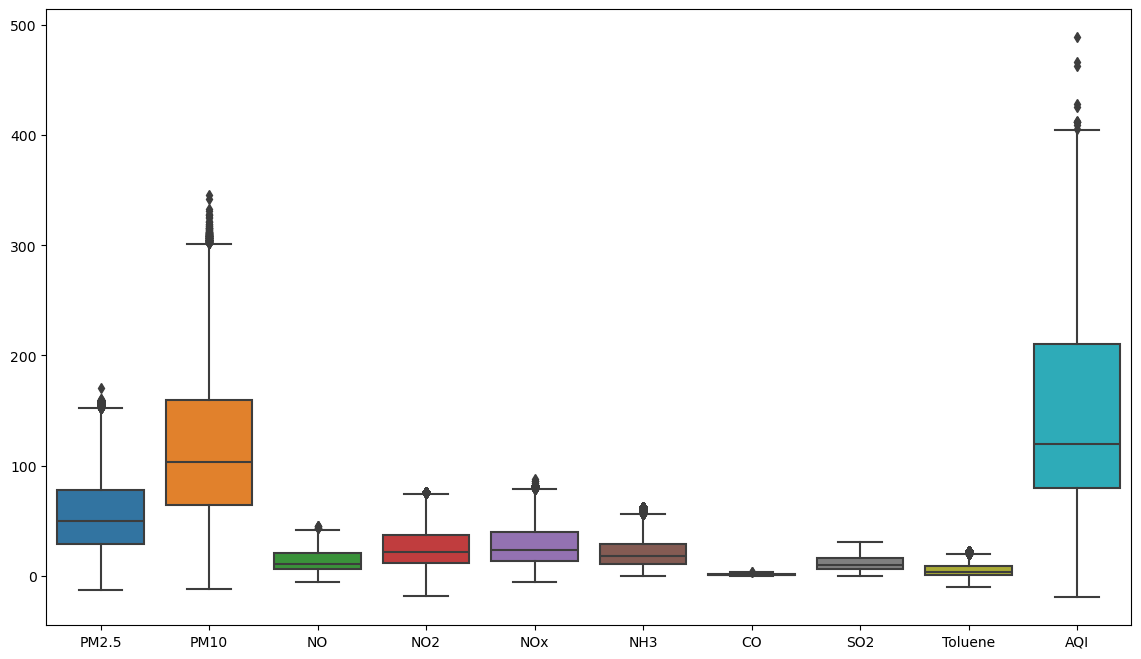

In [144]:
plt.figure(figsize=(14,8))
sns.boxplot(X_combined_ridge[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

<Axes: >

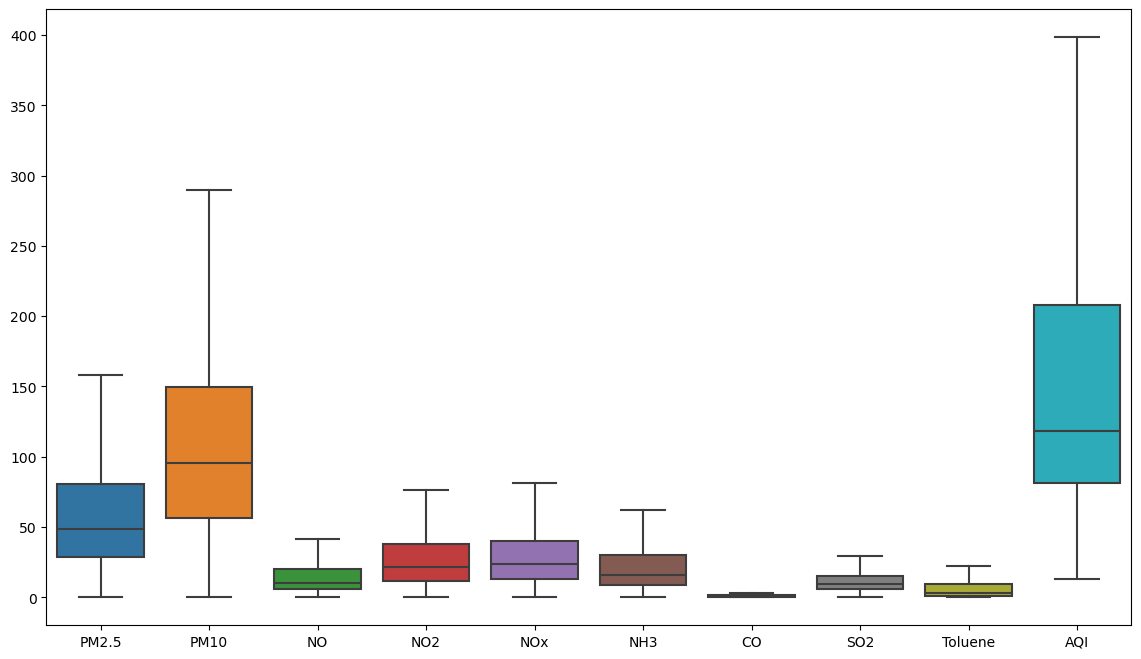

In [145]:
plt.figure(figsize=(14,8))
sns.boxplot(new_df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

In [146]:
X_train_imputed_ridge['Date'] = pd.to_datetime(X_train_imputed_ridge[['year', 'month', 'day']])
X_train_imputed_ridge[['year', 'month', 'day', 'weekday', 'dayofyear','Date']].head(10)

,year,month,day,weekday,dayofyear,Date
0,2018.0,3.0,13.0,1.0,72.0,2018-03-13
1,2019.0,12.0,17.0,1.0,351.0,2019-12-17
2,2020.0,4.0,20.0,0.0,111.0,2020-04-20
3,2020.0,3.0,15.0,6.0,75.0,2020-03-15
4,2018.0,9.0,2.0,6.0,245.0,2018-09-02
5,2018.0,10.0,14.0,6.0,287.0,2018-10-14
6,2018.0,9.0,27.0,3.0,270.0,2018-09-27
7,2018.0,10.0,8.0,0.0,281.0,2018-10-08
8,2018.0,8.0,4.0,5.0,216.0,2018-08-04
9,2016.0,3.0,28.0,0.0,88.0,2016-03-28


In [147]:
X_test_imputed_ridge['Date'] = pd.to_datetime(X_test_imputed_ridge[['year', 'month', 'day']])
X_test_imputed_ridge[['year', 'month', 'day', 'weekday', 'dayofyear','Date']].head(10)

,year,month,day,weekday,dayofyear,Date
0,2017.0,1.0,8.0,6.0,8.0,2017-01-08
1,2016.0,8.0,27.0,5.0,240.0,2016-08-27
2,2016.0,5.0,15.0,6.0,136.0,2016-05-15
3,2019.0,5.0,8.0,2.0,128.0,2019-05-08
4,2017.0,11.0,6.0,0.0,310.0,2017-11-06
5,2019.0,9.0,24.0,1.0,267.0,2019-09-24
6,2019.0,6.0,18.0,1.0,169.0,2019-06-18
7,2017.0,9.0,18.0,0.0,261.0,2017-09-18
8,2019.0,2.0,27.0,2.0,58.0,2019-02-27
9,2017.0,11.0,4.0,5.0,308.0,2017-11-04


In [148]:
# Handling multiple city columns and converting to a single 'City' column
city_columns = [col for col in X_train_imputed_ridge.columns if col.startswith('City_')]
X_train_imputed_ridge['City'] = X_train_imputed_ridge[city_columns].idxmax(axis=1).str.replace('City_', '')

city_columns = [col for col in X_test_imputed_ridge.columns if col.startswith('City_')]
X_test_imputed_ridge['City'] = X_test_imputed_ridge[city_columns].idxmax(axis=1).str.replace('City_', '')


# Dropping the encoded city columns
X_train_imputed_ridge.drop(columns=city_columns, inplace=True)
X_test_imputed_ridge.drop(columns=city_columns, inplace=True)

In [149]:
trainPath = './train_ridge.csv'
testPath = './test_ridge.csv'
X_train_imputed_ridge.to_csv(trainPath, index=False)
X_test_imputed_ridge.to_csv(testpath, index=False)
print(f"DataFrame saved to {trainPath}")
print(f"DataFrame saved to {testPath}")

DataFrame saved to ./train_ridge.csv
DataFrame saved to ./test_ridge.csv


<h2>Implementing Iterative Imputer using Bayesian estimator</h2>

In [110]:
# Importing required methods
from sklearn.experimental import enable_iterative_imputer  
from sklearn.linear_model import BayesianRidge

# Initializing the Iterative Imputer with BayesianRidge estimator
bayesian_imputer = IterativeImputer(
    estimator=BayesianRidge(
    n_iter=500,            
    alpha_1=1e-6,          
    alpha_2=1e-6,           
    lambda_1=1e-6,          
    lambda_2=1e-6,         
    tol=1e-4,               
    fit_intercept=True     
)
,
    max_iter=123,
    random_state=42,
    verbose=2,
    tol=1e-10
)

# Fitting and transforming the training and testing data
X_train_imputed_bayes = bayesian_imputer.fit_transform(X_train)
X_test_imputed_bayes = bayesian_imputer.transform(X_test)

# Displaying the imputed data
print("Imputed X_train:")
print(pd.DataFrame(X_train_imputed_bayes).head())
print("\nImputed X_test:")
print(pd.DataFrame(X_test_imputed_bayes).head())

[IterativeImputer] Completing matrix with shape (23624, 41)
[IterativeImputer] Ending imputation round 1/123, elapsed time 1.26
[IterativeImputer] Change: 480.59121211379875, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 2/123, elapsed time 2.69
[IterativeImputer] Change: 207.69565271036586, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 3/123, elapsed time 4.14
[IterativeImputer] Change: 51.51598651161808, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 4/123, elapsed time 5.61
[IterativeImputer] Change: 42.15589592138684, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 5/123, elapsed time 7.00
[IterativeImputer] Change: 34.72757774678172, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 6/123, elapsed time 8.27
[IterativeImputer] Change: 28.604004569327543, scaled tolerance: 2.02e-07 
[IterativeImputer] Ending imputation round 7/123, elapsed time 9.60
[IterativeImputer

In [111]:
X_train_imputed_bayes = pd.DataFrame(X_train_imputed_bayes, columns=X_train.columns)
X_test_imputed_bayes = pd.DataFrame(X_test_imputed_bayes, columns=X_test.columns)

In [112]:
X_train_imputed_bayes['Date'] = pd.to_datetime(X_train_imputed_bayes[['year', 'month', 'day']])
X_test_imputed_bayes['Date'] = pd.to_datetime(X_test_imputed_bayes[['year', 'month', 'day']])

In [113]:
X_train_imputed_bayes.head(2)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,...,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Date
0,142.27,252.49,17.11,33.82,50.91,9.80,2.86,17.18,12.180105,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-03-13
1,75.61,121.94,2.95,27.03,16.78,15.92,1.12,8.24,7.530000,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019-12-17


In [114]:
X_test_imputed_bayes.head(2)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,...,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Date
0,33.383709,86.162348,21.860745,18.868379,40.326258,14.692778,0.0,11.700778,-0.159122,75.558379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2017-01-08
1,34.683662,80.431764,22.793898,19.287181,41.043836,15.413135,0.0,10.839105,-0.209469,76.559657,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2016-08-27


In [115]:
X_combined_bayes = pd.concat([X_train_imputed_bayes, X_test_imputed_bayes], axis=0)

In [116]:
X_combined_bayes.isnull().sum()

PM2.5                      0
PM10                       0
NO                         0
NO2                        0
NOx                        0
NH3                        0
CO                         0
SO2                        0
Toluene                    0
AQI                        0
year                       0
month                      0
day                        0
weekday                    0
dayofyear                  0
City_Ahmedabad             0
City_Aizawl                0
City_Amaravati             0
City_Amritsar              0
City_Bengaluru             0
City_Bhopal                0
City_Brajrajnagar          0
City_Chandigarh            0
City_Chennai               0
City_Coimbatore            0
City_Delhi                 0
City_Ernakulam             0
City_Gurugram              0
City_Guwahati              0
City_Hyderabad             0
City_Jaipur                0
City_Jorapokhar            0
City_Kochi                 0
City_Kolkata               0
City_Lucknow  

<h5>Changes in Statistical Data of numeric columns before and after Imputing</h5>

In [117]:
# Before
new_df.describe().transpose()[:10]

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,61.148955,42.803676,0.04,28.820,48.57,80.5900,158.24500
PM10,18391.0,112.877919,73.706540,0.01,56.255,95.68,149.7450,289.98000
NO,25949.0,14.507996,12.246567,0.02,5.630,9.89,19.9500,41.43000
NO2,25946.0,27.259387,19.691661,0.01,11.750,21.69,37.6200,76.42500
NOx,25346.0,29.539227,22.721584,0.00,12.820,23.52,40.1275,81.08875
NH3,19203.0,21.361087,16.688309,0.01,8.580,15.85,30.0200,62.18000
CO,27472.0,1.079514,0.815915,0.00,0.510,0.89,1.4500,2.86000
SO2,25677.0,11.743115,8.220634,0.01,5.670,9.16,15.2200,29.54500
Toluene,21490.0,6.231113,7.332004,0.00,0.600,2.97,9.1500,21.97500
AQI,24850.0,157.342455,103.870019,13.00,81.000,118.00,208.0000,398.50000


In [118]:
# After
X_combined_bayes.describe().transpose() [:10]

,count,mean,min,25%,50%,75%,max,std
PM2.5,29531.0,60.05554,-12.991184,28.771665,49.62,78.211041,170.763578,41.223249
PM10,29531.0,120.392273,-11.721768,63.951464,103.39,159.099535,346.259325,73.594991
NO,29531.0,14.738302,-5.693557,5.9,10.68,20.42,44.971859,11.9479
NO2,29531.0,26.53815,-18.484664,11.71,21.12,36.87,76.425,19.13603
NOx,29531.0,28.994658,-5.868862,13.025,23.75,39.275,87.724401,21.726497
NH3,29531.0,21.32792,0.01,10.41,18.23,28.542951,62.18,14.594955
CO,29531.0,1.107686,-0.011634,0.53,0.91,1.52,3.209917,0.823628
SO2,29531.0,12.053189,0.01,6.02,9.85,15.91,30.175205,8.00009
Toluene,29531.0,5.895873,-10.191174,0.85,3.556692,8.353744,22.33395,6.675284
AQI,29531.0,156.373048,-19.881622,80.0,120.0,210.0,488.757922,102.57849


<h5>Changes in Correlation of various important columns with 'AQI' after Imputing</h5>

In [150]:
# Before ElasticNet Imputation
new_df.corr(numeric_only=True)['AQI'][:-5]

PM2.5      0.846661
PM10       0.850268
NO         0.513341
NO2        0.510401
NOx        0.529350
NH3        0.379542
CO         0.579902
SO2        0.399403
Toluene    0.400889
AQI        1.000000
Name: AQI, dtype: float64

In [151]:
# After ElasticNet Imputation
X_combined.corr(numeric_only=True)['AQI'][:11]

PM2.5      0.852206
PM10       0.883562
NO         0.517950
NO2        0.510100
NOx        0.504211
NH3        0.421930
CO         0.566103
SO2        0.401233
Toluene    0.416770
AQI        1.000000
year      -0.234248
Name: AQI, dtype: float64

<Axes: >

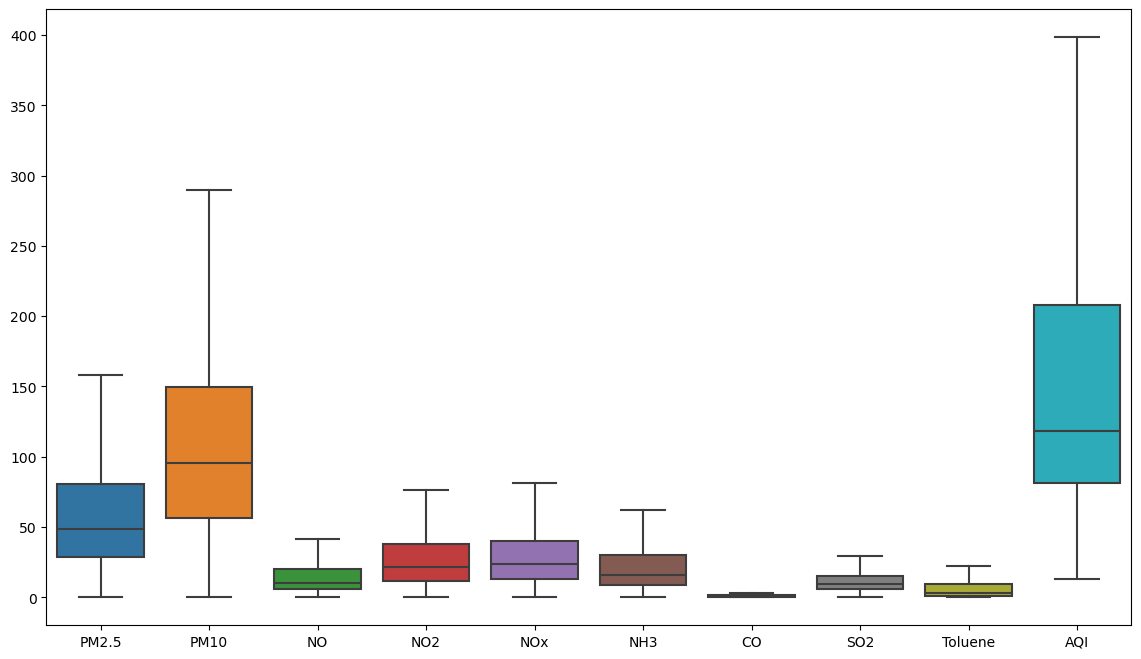

In [120]:
plt.figure(figsize=(14,8))
sns.boxplot(new_df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

<Axes: >

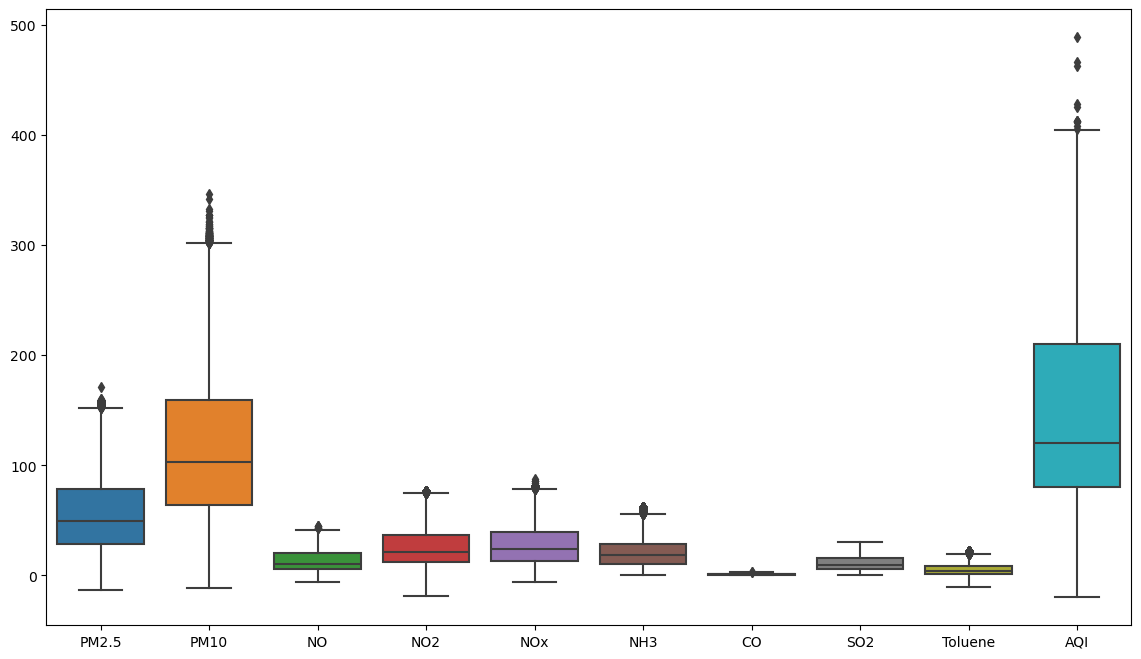

In [119]:
plt.figure(figsize=(14,8))
sns.boxplot(X_combined_bayes[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
        'Toluene',  'AQI']])

In [152]:
X_train_imputed['Date'] = pd.to_datetime(X_train_imputed[['year', 'month', 'day']])
X_train_imputed[['year', 'month', 'day', 'weekday', 'dayofyear','Date']].head(2)

,year,month,day,weekday,dayofyear,Date
0,2018.0,3.0,13.0,1.0,72.0,2018-03-13
1,2019.0,12.0,17.0,1.0,351.0,2019-12-17


In [153]:
X_test_imputed['Date'] = pd.to_datetime(X_test_imputed[['year', 'month', 'day']])
X_test_imputed[['year', 'month', 'day', 'weekday', 'dayofyear','Date']].head(2)

,year,month,day,weekday,dayofyear,Date
0,2017.0,1.0,8.0,6.0,8.0,2017-01-08
1,2016.0,8.0,27.0,5.0,240.0,2016-08-27


In [155]:
# Handling multiple city columns and converting to a single 'City' column
city_columns = [col for col in X_train_imputed_bayes.columns if col.startswith('City_')]
X_train_imputed_bayes['City'] = X_train_imputed_bayes[city_columns].idxmax(axis=1).str.replace('City_', '')

# Dropping the encoded city columns
X_train_imputed_bayes.drop(columns=city_columns, inplace=True)
X_train_imputed_bayes.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,month,day,weekday,dayofyear,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.910000,9.800000,2.860000,17.180000,12.180105,325.000000,2018.0,3.0,13.0,1.0,72.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.780000,15.920000,1.120000,8.240000,7.530000,128.000000,2019.0,12.0,17.0,1.0,351.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.710000,6.010000,0.480000,5.800000,3.022075,46.000000,2020.0,4.0,20.0,0.0,111.0,2020-04-20,Thiruvananthapuram
3,51.226705,141.931893,22.695044,12.817709,29.873171,10.470932,1.666053,23.719064,1.540898,158.786662,2020.0,3.0,15.0,6.0,75.0,2020-03-15,Talcher
4,16.660000,38.762942,7.440000,28.000000,23.790000,28.830000,0.820000,5.030000,0.210000,69.000000,2018.0,9.0,2.0,6.0,245.0,2018-09-02,Lucknow


In [156]:
# Handling multiple city columns and converting to a single 'City' column
city_columns = [col for col in X_test_imputed_bayes.columns if col.startswith('City_')]
X_test_imputed_bayes['City'] = X_test_imputed_bayes[city_columns].idxmax(axis=1).str.replace('City_', '')

# Dropping the encoded city columns
X_test_imputed_bayes.drop(columns=city_columns, inplace=True)
X_test_imputed_bayes.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,month,day,weekday,dayofyear,Date,City
0,33.383709,86.162348,21.860745,18.868379,40.326258,14.692778,0.00,11.700778,-0.159122,75.558379,2017.0,1.0,8.0,6.0,8.0,2017-01-08,Mumbai
1,34.683662,80.431764,22.793898,19.287181,41.043836,15.413135,0.00,10.839105,-0.209469,76.559657,2016.0,8.0,27.0,5.0,240.0,2016-08-27,Mumbai
2,58.500000,95.607623,11.230000,17.050000,28.290000,13.137121,1.14,5.130000,0.640000,137.000000,2016.0,5.0,15.0,6.0,136.0,2016-05-15,Patna
3,78.570000,163.063553,6.850000,5.450000,5.570000,4.766307,1.33,29.545000,16.320000,190.000000,2019.0,5.0,8.0,2.0,128.0,2019-05-08,Patna
4,158.245000,264.336473,40.040000,50.590000,60.420000,35.470000,1.22,9.710000,1.190000,339.000000,2017.0,11.0,6.0,0.0,310.0,2017-11-06,Lucknow


In [157]:
trainPath = './train_bayes.csv'
testPath = './test_bayes.csv'
X_train_imputed.to_csv(trainPath, index=False)
X_test_imputed.to_csv(testpath, index=False)
print(f"DataFrame saved to {trainPath}")
print(f"DataFrame saved to {testPath}")

DataFrame saved to ./train_bayes.csv
DataFrame saved to ./test_bayes.csv


# Summary
In this analysis, we addressed missing values in the dataset using the Multiple Imputation by Chained Equations (MICE) technique. To enhance the accuracy and robustness of the imputation process, we used three different estimators: Bayesian Regression, Elastic Net, and Ridge Regression. These estimators were used in an iterative process to predict and fill in missing values based on the relationships between features.

Before applying the MICE technique, we preprocessed the dataset by removing outliers. This step was crucial to ensure that the imputation models were not skewed by extreme values, thereby improving the quality and reliability of the imputations.

Overall, this approach allowed us to handle missing data effectively and prepare a cleaner dataset for subsequent analysis and modeling tasks.